# IBM Data Science Professional Certificate
## Part 9: Applied Data Science Capstone - Week 4

##### Week 4 - Part 1: Introduction / Business Problem

<b>Assignment:</b> Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

This submission will eventually become your Introduction/Business Problem section in your final report. So I recommend that you push the report (having your Introduction/Business Problem section only for now) to your Github repository and submit a link to it.

<b>Current Idea:</b> Robins Air Force Base sits right outside Warner Robins and is a major employer in the state of Georgia. Anyone that's visited the town of Warner Robins quickly realizes that there are an abundance of restaurants in the town. 

I have a friend that has gotten the entrepreneurial spirit and wants to start a business. He is set on starting a restaurant and has asked for my help to figure out what kind and where to put it. He doesn't care what type of restaurant, but he wants it to be successful (and near his home in the city.)

I have decided to help him by using Foursquare data to map out the current restaurants in Warner Robins and identify restaurant types that are well established in other parts of town, but under-represented in his part of town. From there, I will further identify potential locations near his home. 

When complete, I hope to be able to offer him a location and type of restaurant suggestion based on current data, which he can then take and start doing more research on his own.

<b>Full-Disclosure:</b> I was excited about the previous idea, but when I started pulling the data from Foursquare for Warner Robins, nothing came up. I got a Foursquare app and checked for myself.. Apparently Foursquare doesn't have any of the hundreds of restaurants listed in Warner Robins. After some further investigation, I found a town a bit north (Macon, GA) that has Foursquare data. In normal circumstances, I would find a different dataset to use for Warner Robins, but due to the requirement for Foursquare in this assignment, I need to change locations.

<b>Updated Business Problem:</b> I will assume I have a friend who's wife is a professor at Mercer University in Macon, GA. 

My friend has a very strong entrepreneurial spirit and came to me for some assistance. He wants to open up a restaurant in Macon that's close enough to Mercer that his wife would be able to visit him for lunch from time to time as he's working. 

He wants to be smart about it though, and would like me to determine what kind of restaurant he should start and where he should put it.

I have decided to help him by using Foursquare data to cluster the current restaurants around Mercer and identify restaurant types that are well established in one segment, but not in another. From there, I will further identify potential locations near the college. 

~~~

##### Week 4 - Part 2: The Data

<b>Assignment:</b> Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.

This submission will eventually become your Data section in your final report. So I recommend that you push the report (having your Data section) to your Github repository and submit a link to it.

<b>General Idea:</b> I want to take FourSquare data for Macon restaurants and try to identify style of restaurant based on venue category. From there, I will do <i>k</i>-means clustering and find the optimal <i>k</i> to get an understanding of how the area is actually segmented by restaurants, then within one cluster, I want to find a style of restaurant that is highly represented in other clusters, but not in the selected.

<i>More specific version:</i>

<b>Step 1:</b> Get an understanding of how the area around Mercer is currently segmented for all restaurants by performing k-means clustering, and searching for the optimal k.
    To do this, I will use Foursquare Venue Categories within the top-level 'food' group for the data to perform k-means clustering.

<b>Step 2:</b> Find optimal-<i>k</i> clusters and assign each venue to a cluster.

<b>Step 3:</b> Plot a new map with colored clusters to visually understand the data. 

<b>Step 4:</b> Rank the categories within each cluster.

<b>Step 5:</b> I will then choose a cluster. I'll assume my client has a preference of a given cluster and would want to start his business there.

<b>Step 6:</b> I want to compare the top types of restaurants within each cluster to the chosen cluster and determine dissimilarities.
    This will provide insight because if a certain restaurant is well represented on the east side of town (for example) and under-represented on the west side of town, there is an opportunity to establish a new restaurant on the west side.
    
<b>Step 7:</b> Choose a restaurant type. Ideal type would be highly represented in other clusters, but lowly represented in the chosen cluster.

<b>Step 8:</b> If the clusters are still rather large, do another round of clustering on the chosen cluster to try and identify a more specific area to locate a restaurant. I would want to recommend a location for the restaurant near other, but dissimilar restaurants.

<b>Step 9:</b> Choose a location. At this point we should be able to say I think you should start X restaurant around Y location.

# IBM Data Science Professional Certificate
## Part 9: Applied Data Science Capstone - Week 5

#### Import the libraries and install Folium.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

import matplotlib.pyplot as plt # plotting library
import matplotlib.cm as cm
import matplotlib.colors as colors
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed.')
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.18.1-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00  18.61 MB/s
geopy-1.18.1-p 100% |################################| Time: 0:00:00  37.88 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  57.76 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  35.38 MB/s
vincent-0.4.4- 100% |###################

#### Assign my Foursquare developer credentials to variables to use in URL later.

In [2]:
# The code was removed by Watson Studio for sharing.

#### Assign other variables to be used in URL generation.

In [3]:
VERSION = '20180604' # set the API version to use.
LIMIT = 200 # set the number of entries (max) to return. Supposed to be max 50, but seems to return more.
RADIUS = 500 # set the radius of the search (in meters). If radius is not specified, a suggested radius will be used based on the density of venues in the area.
category_food = '4d4b7105d754a06374d81259' # the top-level ID for Food based on https://developer.foursquare.com/docs/resources/categories

#### Get the geo-location of Mercer University to be used as our starting point.

In [4]:
address = '1501 Mercer University Drive, Macon, Georgia 31207' # location of Mercer University

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("Mercer University is located at: ",latitude, longitude)

Mercer University is located at:  32.8259633 -83.6546847


#### Create a URL dynamically to make API calls to Foursquare.

In [5]:
# Removed radius to get suggested radius based on density of area.
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, VERSION, latitude, longitude, category_food, LIMIT)

#### Make the actual request to Foursquare and get the JSON results, assigning them to 'results' variable.

In [6]:
results = requests.get(url).json()
'There are {} food places around Mercer University.'.format(len(results['response']['groups'][0]['items']))

'There are 100 food places around Mercer University.'

#### Mental Check-in:
Currently, 'results' is JSON data that is very cluttered with stuff we don't need.

Example of some of this data:

{'meta': {'code': 200, 'requestId': '5c66a147dd57977bd504d308'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4ba8e621f964a5204ff839e3-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/southern_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d14f941735',
         'name': 'Southern / Soul Food Restaurant',
         'pluralName': 'Southern / Soul Food Restaurants',
         'primary': True,
         'shortName': 'Southern / Soul'}],
       'id': '4ba8e621f964a5204ff839e3',
       'location': {'address': '1191 Oglethorpe St',
       
       
In all this data, we're only looking for the Category Name, Name of the Venue, and the Location of the Venue (Lat/Lon) to get do our analysis.

The next steps below parse through this data and extract only the necessary pieces.

#### Assign the relevant parts of JSON to 'venues'.

In [7]:
venues = results['response']['groups'][0]['items']
#venues

#### Flatten the JSON data into a dataframe.

In [8]:
nearby_venues = json_normalize(venues)
#nearby_venues

#### Assign 'filtered_columns' with the column names we want to keep (Name, Categories, Lat, Lng).

In [9]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']

#### Re-assign 'nearby_venues' dataframe to a dataframe containing only our 'filtered_columns'.
So far, the name, lat and lng are in a good place. Still need to clean up how categories are coming in.

In [10]:
nearby_venues = nearby_venues.loc[:, filtered_columns]
#nearby_venues

#### Define a function 'get_category_type' that we will use to clean up the categories in our dataframe.
This function goes row by row in the dataframe and looks for venue.categories or categories and if it finds them, it returns the 'name' of the category. Otherwise it returns 0.

In [11]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Run the 'get_category_type' function we created on the 'venue.categories' column and then clean the columns.

In [12]:
# run the function on venue.categories
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

#### Check the head rows to make sure all our steps produced the desired output.

In [13]:
nearby_venues.head()

,name,categories,lat,lng
0,Bears Den,Southern / Soul Food Restaurant,32.832927,-83.643262
1,Margaritas Mercer Village,Mexican Restaurant,32.832739,-83.651474
2,Roly Poly,Sandwich Place,32.835343,-83.634710
3,Francar's Buffalo Wings,Wings Joint,32.833043,-83.650336
4,The Rookery,American Restaurant,32.836280,-83.628172


In [14]:
print('The area around Mercer University has {} types of food venues and {} individual venues.'.format(
        len(nearby_venues['categories'].unique()),
        nearby_venues.shape[0]
    )
)

The area around Mercer University has 28 types of food venues and 100 individual venues.


#### Check how this information looks visually using Folium.
Since we have a key location to start, let's mark it differently than all our venues.

In [15]:
# generate map centred around Mercer University
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# add Mercer as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Mercer University',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)

# add popular spots to the map as blue circle markers
for lat, lng, label in zip(nearby_venues.lat, nearby_venues.lng, nearby_venues.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

#### Mental Check-in:
We now have a dataframe with the names, categories, and location (lat/lon) called 'nearby_venues' and a folium map set up to visualize the venues called 'venues_map'.

This covers everything I set out to do in "Step 1" of my Data section above.

Moving into "Step 2", I need to determine the optimal number of clusters (<i>k</i>) for this data, then update the 'nearby_venues' dataframe with the assigned cluster. Then re-visualize the data.

In order to find the optimal <i>k</i> value, we will use a method called the <b>elbow method</b>.

### Seeking optimal *k*

In [16]:
# isolate just the lat lng columns as 'lat_lng'

cont_feat = ['lat', 'lng']
lat_lng = nearby_venues[cont_feat]
lat_lng.head()

,lat,lng
0,32.832927,-83.643262
1,32.832739,-83.651474
2,32.835343,-83.634710
3,32.833043,-83.650336
4,32.836280,-83.628172


In [17]:
# get a description of the lat / lon data.

nearby_venues[cont_feat].describe()

,lat,lng
count,100.000000,100.000000
mean,32.832168,-83.649779
std,0.016133,0.024554
min,32.786039,-83.700374
25%,32.820014,-83.665170
50%,32.835618,-83.642995
75%,32.842891,-83.628582
max,32.857568,-83.612580


In [18]:
Ssd = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(nearby_venues[cont_feat])
    Ssd.append(km.inertia_)

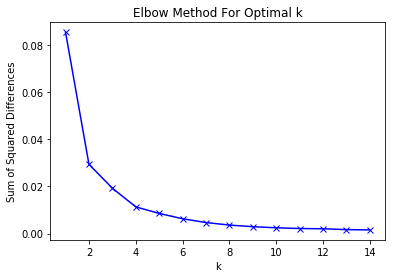

In [19]:
plt.plot(K, Ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Differences')
plt.title('Elbow Method For Optimal k')
plt.show()

This elbow method above doesn't have as distinct of an elbow as I would like.

To me, it seems like a good choice for k would be 2, 3 or 4. Rather than just pick a number, I want to look a bit closer at the rate of change between the points.

To do this, I'll cycle through the list of Ssd and calculate the difference between a list element and the previous list element. The returned list will be the rate of change starting with the 2nd point.

In [20]:
#show the values in the chart above, for easier understanding of the math.

Ssd

[0.085455501653080468,
 0.029393010533264805,
 0.019255872586262525,
 0.011329663775685252,
 0.0085396644602332775,
 0.0062831210722345951,
 0.0046690217546662537,
 0.0035960103425121026,
 0.0029138032535051032,
 0.0024420182106250068,
 0.0021346438527391071,
 0.0020250533277825773,
 0.0016721400677569306,
 0.0015416420799489691]

In [21]:
# take a given list element (starting with the 2nd one) and subtract the previous list element from it.
# For example, 0.0294 - 0.0855 for the first entry returns -0.056
# Repeat for the entire list.

[j-i for i, j in zip(Ssd[:-1], Ssd[1:])]

[-0.056062491119815663,
 -0.01013713794700228,
 -0.0079262088105772725,
 -0.0027899993154519749,
 -0.0022565433879986824,
 -0.0016140993175683413,
 -0.0010730114121541511,
 -0.00068220708900699947,
 -0.00047178504288009635,
 -0.00030737435788589975,
 -0.00010959052495652976,
 -0.00035291326002564669,
 -0.00013049798780796155]

As I review this rate of change in the chart, I really start to see the sum of squares taper off after the 4th <i>k</i>.

For the remainder of this exercise, I'm going to use <b><i>k</i> = 4</b> for my clusters.

This covers everything I set out to do in "Step 2" of my Data section above.

### Setting up *k*-means

The KMeans class has many parameters that can be used, but we will use these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++". k-means++ selects initial cluster centers for <i>k</i>-means clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (the number we determined in our previous step)</li> </ul>
    <li> <b>n_init</b>: Number of times the <i>k</i>-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 15 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called **k_means**.

In [22]:
k_val = 4

In [23]:
k_means = KMeans(init="k-means++", n_clusters= k_val, n_init=15)

In [24]:
# let's fit our latitudes and longitude data into clusters.

k_means.fit(lat_lng)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
# label each venue with a cluster

k_means_labels = k_means.labels_
k_means_labels

array([3, 0, 3, 0, 3, 3, 3, 0, 3, 2, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2,
       2, 1, 3, 1, 0, 0, 2, 3, 3, 1, 2, 3, 1, 2, 2, 2, 2, 3, 1, 1, 2, 1, 3,
       3, 3, 3, 2, 2, 0, 0, 1, 1, 0, 2, 0, 3, 3, 1, 3, 0, 2, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1], dtype=int32)

In [26]:
# add the cluster label to our 'nearby_venues' dataframe for a complete view

nearby_venues["Cluster"] = k_means_labels
nearby_venues.head(5)

,name,categories,lat,lng,Cluster
0,Bears Den,Southern / Soul Food Restaurant,32.832927,-83.643262,3
1,Margaritas Mercer Village,Mexican Restaurant,32.832739,-83.651474,0
2,Roly Poly,Sandwich Place,32.835343,-83.634710,3
3,Francar's Buffalo Wings,Wings Joint,32.833043,-83.650336,0
4,The Rookery,American Restaurant,32.836280,-83.628172,3


In [27]:
# Identify the centers (mean) of each cluster and assign to 'clus_center'

clus_center = nearby_venues.groupby('Cluster').mean().reset_index('Cluster')
clus_center

,Cluster,lat,lng
0,0,32.841573,-83.664249
1,1,32.818784,-83.694931
2,2,32.806457,-83.663854
3,3,32.840681,-83.629549


In [28]:
# generate map centred around Mercer University including new clusters
c_venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# set color scheme for clusters
x = np.arange(k_val)
ys = [i + x + (i*x)**2 for i in range(k_val)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

marker_colors = []

# add popular spots to the map as blue circle markers
for lat, lng, poi, cat,  cluster in zip(nearby_venues["lat"], nearby_venues["lng"], nearby_venues["name"], nearby_venues["categories"], nearby_venues["Cluster"]):
    venue_label = folium.Popup(str(poi) + ' (' + str(cat) + ') Cluster: '+ str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=venue_label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7
        ).add_to(c_venues_map)

# add Mercer as a pink circle mark with black fill
folium.features.CircleMarker(
    [latitude, longitude],
    radius=8,
    popup='Mercer University',
    fill=True,
    color='#fb14ff',
    fill_color='black',
    fill_opacity=0.9
    ).add_to(c_venues_map)

# add centers as a black circle with pink fill
for lat, lng, cluster in zip(clus_center["lat"], clus_center["lng"], clus_center["Cluster"]):
    ctr_label = folium.Popup('Center of Cluster: '+ str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=ctr_label,
        fill=True,
        color='black',
        fill_color='#fb14ff',
        fill_opacity=0.9
        ).add_to(c_venues_map)

# display map
c_venues_map

This map displays each of the venues color coded by cluster. I've additionally added a mark for Mercher University (pink circle, black fill) and the centers for each cluster (black circle, pink fill).

This concludes what I intended to accomplish in "Step 3".

Now it is time to start comparing the clusters.

### Examine the Clusters

To start, let's look at the top types of venues in each cluster.

In [29]:
# reminder of what our current data table looks like

nearby_venues.head()

,name,categories,lat,lng,Cluster
0,Bears Den,Southern / Soul Food Restaurant,32.832927,-83.643262,3
1,Margaritas Mercer Village,Mexican Restaurant,32.832739,-83.651474,0
2,Roly Poly,Sandwich Place,32.835343,-83.634710,3
3,Francar's Buffalo Wings,Wings Joint,32.833043,-83.650336,0
4,The Rookery,American Restaurant,32.836280,-83.628172,3


In [30]:
# how many venues do we have in each cluster
nearby_venues.groupby("Cluster").count()

,name,categories,lat,lng
Cluster,,,,
0,17,17,17,17
1,13,13,13,13
2,17,17,17,17
3,53,53,53,53


So it looks like we have 13 locations in Cluster 0, 53 locations in Cluster 1, 19 locations in Cluster 2, and 15 locations in Cluster 3.

In [31]:
print('Overall, there are {} uniques categories.'.format(len(nearby_venues["categories"].unique())))

Overall, there are 28 uniques categories.


Now we're going to one hot encode each of the categories so we can run analysis on each cluster.

In [32]:
# one hot encoding
nearby_onehot = pd.get_dummies(nearby_venues[["categories"]], prefix="", prefix_sep="")

# add cluster column back to dataframe
nearby_onehot["Cluster"] = nearby_venues["Cluster"] 

# move cluster column to the first column
fixed_columns = [nearby_onehot.columns[-1]] + list(nearby_onehot.columns[:-1])
nearby_onehot = nearby_onehot[fixed_columns]

nearby_onehot.head()

,Cluster,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Breakfast Spot,Burger Joint,Café,Cajun / Creole Restaurant,...,Mexican Restaurant,Pizza Place,Restaurant,Sandwich Place,Seafood Restaurant,Southern / Soul Food Restaurant,Steakhouse,Taco Place,Vegetarian / Vegan Restaurant,Wings Joint
0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# examine the new dataframe

nearby_onehot.shape

(100, 29)

In [34]:
# group the rows by the cluster # by taking the mean of each frequency

nearby_grouped = nearby_onehot.groupby("Cluster").mean().reset_index()
nearby_grouped

,Cluster,American Restaurant,Asian Restaurant,BBQ Joint,Bakery,Bistro,Breakfast Spot,Burger Joint,Café,Cajun / Creole Restaurant,...,Mexican Restaurant,Pizza Place,Restaurant,Sandwich Place,Seafood Restaurant,Southern / Soul Food Restaurant,Steakhouse,Taco Place,Vegetarian / Vegan Restaurant,Wings Joint
0,0,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.058824,0.176471,0.058824,0.117647,0.058824,0.000000,0.000000,0.000000,0.058824,0.058824
1,1,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.153846,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000
2,2,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.058824,0.000000,0.058824,0.117647,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000
3,3,0.132075,0.056604,0.037736,0.000000,0.018868,0.018868,0.018868,0.018868,0.018868,...,0.037736,0.094340,0.018868,0.132075,0.018868,0.037736,0.018868,0.018868,0.000000,0.000000


In [35]:
# Let's look at the 5 most common categories per cluster

num_top_venues = 5

for cluster in nearby_grouped["Cluster"]:
        print("----- Cluster: "+str(cluster)+" -----")
        temp = nearby_grouped[nearby_grouped["Cluster"] == cluster].T.reset_index()
        temp.columns = ["categories", "freq"]
        temp = temp.iloc[1:]
        temp["freq"] = temp["freq"].astype(float)
        temp = temp.round({"freq": 2})
        print(temp.sort_values("freq", ascending=False).reset_index(drop=True).head(num_top_venues))
        print("\n")

----- Cluster: 0 -----
            categories  freq
0          Pizza Place  0.18
1        Deli / Bodega  0.18
2       Sandwich Place  0.12
3  American Restaurant  0.06
4     Greek Restaurant  0.06


----- Cluster: 1 -----
                        categories  freq
0             Fast Food Restaurant  0.54
1                   Sandwich Place  0.15
2              American Restaurant  0.08
3                           Bakery  0.08
4  Southern / Soul Food Restaurant  0.08


----- Cluster: 2 -----
                        categories  freq
0             Fast Food Restaurant  0.41
1                   Sandwich Place  0.12
2              Fried Chicken Joint  0.12
3  Southern / Soul Food Restaurant  0.06
4               Seafood Restaurant  0.06


----- Cluster: 3 -----
             categories  freq
0  Fast Food Restaurant  0.15
1   American Restaurant  0.13
2        Sandwich Place  0.13
3           Pizza Place  0.09
4      Asian Restaurant  0.06




This completes what I wanted to accomplish for "Step 4".

For "Step 5", we can use the lists above to quickly see that Fast Food Restaurants are the #1 most common venue in clusters 0-2, but doesn't even make the top 5 in Cluster 3.

At this point, I can recommend my friend to look into a Fast Food Restaurant within the area defined as Cluster 2.

This completes "Step 5" through "Step 7" just by reviewing this data. Since my clusters are not very large, I will not be re-doing the entire process on the venues in Cluster 3.

#### Thank you for taking the time to review my project. Please leave some notes / critiques so that I can improve in the future.